In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

###**Transformations**

**In class we covered some of the transformation types that we could apply to images, and we'll go over some of them here using OpenCV's function to see firsthand what they do to images.**

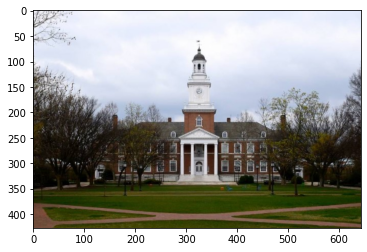

In [ ]:
image = cv2.imread('image_transformation.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rows, cols, channels = image.shape
plt.figure()
plt.imshow(image)

**Recall from class that we can represent transformations using matrices. As we are operating in 2D but with homogeneous coordinates, every linear transformation can be represented as a 3x3 matrix.**

**Below, create a 3x3 matrix that represents a scaling of 0.5 in the x-dimension. Then, using OpenCV's warpprojective, apply this to the loaded image and plot it.**

In [ ]:

output = cv2.warpPerspective(image, transform, (cols, rows))
plt.figure()
plt.imshow(output)

**We see that there is black space to the right of the image (assuming you did it correctly). This is because our image has changed size. This type, change the (cols, rows) input parameter of warpPerspective so that the output image does not contain that black space to the right. Display the result.**

**Now let's see what happens with a translation. Create a 3x3 matrix that represents a translation by 60 pixels to the right in the x direction and 120 pixels up in the y direction. Use warpPerspective (with output image size the same as original image size) to apply this transformation and display the resulting image.**

**Now, create a 3x3 matrix that represents a rotation by 30 degrees clockwise, and apply this to the image via warpPerspective, with output image size the same as original image size. Display the result.**

**Where is the center of rotation in this case? How would you change it so that the image rotates about its center?**

**Create a transformation matrix that performs a rotation of 30 degrees clockwise with the center of rotation about the center of the image. You can do this by computing where the new center of the image would be after the rotation, and adding a translation to move it back to the center. Again, apply this to our image via warpPerspective with output image size the same as original image size, and display the result.**

**For homogeneous coordinates, is the rotation performed first or the translation?**

**Now let's see what shear does to the image. Set the x component of the shear parameter to 2, and apply that to the image, and display the results.**

**What does this do to the image? Play around with the shear parameters so you have a better understanding.**

**Now create a 3x3 transformation matrix that represents a 15 degree counterclockwise rotation, a scaling by 1.5 in the x direction, a shear in the y direction of 1.2, and finally a translation by (-300, -200). Display the result.**

**How can we tell that this is an affine transformation? What is preserved for affine transformations?**

**How do we tell from a transformation matrix that it is an affine transformation?**

**Now set the last row of the previous transformation matrix to be $[-0.002, 0.004, 1]$, and apply the transformation to the image and display the result.**

**How can you tell from the image that this is no longer an affine transformation and is instead a homography?**

**Even though there are $3\text{ rows }\cdot 3\text{ cols }=9$ parameters for a homography, there are only 8 degrees of freedom. This is because homographies are only defined up to scale, as when we convert from homogeneous coordinates back to 2D coordinates, we divide by the last component, so the scale of the last component is constrained to be 1.**

**Demonstrate this by multiplying the transformation obtained above by 3, and using that to transfrom the image, and display the result. You should observe that the image is identical to that above.** 

###**Image Warping**

**In above, we've seen how given a transformation matrix we can use OpenCV to transform our input image accordingly. Here, we'll see how we can perform these transformations ourselves.**

**To do this, let's first create a transformation matrix that represents a 30 degree clockwise rotation about the center of the image (you've already done this earlier. Use OpenCV to perform the transformation and display the image. This is what we want to achieve.**

**We can first attempt to do image warping by looping through every single pixel of the image, performing the transformation on the coordinates of that pixel, and assign the resulting coordinate to have the same pixel intensities as the original. This is forward warping.**

**We can do this initially by rounding the resulting coordinates to the closest integers, and we ignore all pixels that map to locations outside of the output image matrix.**

In [ ]:
output_image = np.zeros((rows, cols, 3), dtype=int)

for i in range(rows):
  for j in range(cols):

    # Get the resulting pixel coordinate after applying the transformation above for pixel (j, i)


    # Round the pixel coordinates to the nearest integer values


    # Check that the coordinates are within bounds
    # If they are, then assign that coordinate in the output_image to have the same pixel values
    # as the input pixel from the original image


plt.figure(figsize=(12, 8))
plt.imshow(output_image)

**The image looks roughly like the one transformed via OpenCV. But what is strange about the image? What do you think could be the issue?**

**In order to combat this problem, we need to interpolate the pixel contributions instead of rounding it to the nearest pixel value. That is, if we have a non-integer pixel coordinate, we add contribution to the overlapped pixels proportional to the area of overlap.**

**To do that, let's first create a helper function that given an x and y, finds the list of x and y pixel coordinates that it overlaps with, along with area of overlap with that pixel.**

**For example, given $(x, y) = (10.3, 20.2)$, the function should return $$[[10, 20, 0.56], [10, 21, 0.14], [11, 20, 0.24], [11, 21, 0.06]]$$ since $(10.3, 20.2)$ overlaps with $(11, 21)$ by $0.3$ in the x-direction and $0.2$ in the y-direction, which results in area $0.3 \cdot 0.2 = 0.06$, as seen by the last term in the list.**

In [ ]:
def get_pixel_contributions(x, y):
  """ Gets the overlapped pixels along with the relative contributions.
      Args:
        x: The x-coordinate
        y: The y-coordinate
      Return:
        pixel_contributions: List of [x, y, contribution] where (x, y) are the coordinates of
                             pixels that the input overlaps with.
  """

  pixel_contributions = []


  return pixel_contributions



**Now we have that, we can see how interpolation does. Run the code below.**

In [ ]:
def forward_warping(transform, image):

  output_image = np.zeros((rows, cols, 3), dtype=int)

  for i in range(rows):
    for j in range(cols):

      # Get the resulting pixel coordinate after applying the transformation above for pixel (j, i()
      result = transform @ np.array([[j], [i], [1]])

      # Get the interpolated pixel coordinates and the corresponding contributions
      interpolations = get_pixel_contributions(result[0, 0], result[1, 0])

      for k in range(4):
        x = interpolations[k][0]
        y = interpolations[k][1]
        scale = interpolations[k][2]
        if -1 < x < cols and -1 < y < rows:
          output_image[y, x, 0] += int(scale * image[i, j, 0])
          output_image[y, x, 1] += int(scale * image[i, j, 1])
          output_image[y, x, 2] += int(scale * image[i, j, 2])
  
  return output_image

output_image = forward_warping(transform, image)
plt.figure(figsize=(12, 8))
plt.imshow(output_image)

**This should look much better.**

**Though this looks nice on our image, there are still some artifacts in the image. This will be amplified when we have shear. Using the matrix below, plot the transformed image with that matrix first via OpenCV's warpPerspective, then using our implementation forward_warping above.**

In [ ]:
transform = np.array([[ 1.75947159e+00,  2.58819045e-01, -3.00000000e+02],
 [ 9.00291946e-01,  9.65925826e-01, -2.00000000e+02],
 [ 0.00000000e+00, 0.00000000e+00,  1.00000000e+00]])



**You'll probably be able to se the line artifacts across the entire image.**

**Hence an alternative to this is inverse warping, where instead of transforming each pixel from the input image, we take every pixel of the output image, perform the inverse transform, and see where it maps to from the input image and take those values.**

In [ ]:
def inverse_warping(transform, image):

  output_image = np.zeros((rows, cols, 3), dtype=int)

  # Invert the transformation matrix


  for i in range(rows):
    for j in range(cols):

      # Get the resulting pixel coordinate after applying the inverse transformation above for pixel (j, i()
      result = transform @ np.array([[j], [i], [1]])

      # Use interpolation 
      interpolations = get_pixel_contributions(result[0, 0], result[1, 0])

      # Do something similar to forward_warping but with inverse warping


  return output_image

output_image = inverse_warping(transform, image)
plt.figure(figsize=(12, 8))
plt.imshow(output_image)

**You should notice that the line artifacts are gone and the result pretty much looks like OpenCV's implementation of warpPerspective (although it's quite a lot slower).**

###**Computing Transformations**

**Now that we know how to perform transformations, given two images, how do we find the transformation between them?**

**We've been talking about features for the past couple of weeks, and this is where they come in - features are needed to find matching locations in different images so that we can estimate a transformation that brings one image to another.**

**We'll first explore how we can find a translation transformation between two images using features.**

**Defined below are the image_features, which are some features of our image. On display_image, draw red circles around the image_features, and display them.**

In [ ]:
image_features = [[326, 60], [285, 249], [366, 249], [40, 412]]
display_image = image.copy()



**Say we have another image that is our original image but with a translation. Shown below are the same features, but in the translated image. Draw circles around these translated_features in blue on the same display image drawn above.**

In [ ]:
translated_features = [[424, 45], [385, 233], [470, 230], [140, 399]]


**Now we need to find the transformation/translation that brings the red points to the blue points. We saw in lecture that we can do this using least squares, by setting up an $At=b$ relationship.**

**Below, fill the $A$ matrix and $b$ vector with the correct values, and compute $t=(A^TA)^{-1}A^Tb$.**

In [ ]:
A = np.zeros((8, 2))
b = np.zeros((8, 1))


**Reshape $t$ to be a transformation matrix, and apply the transformation to our original image. Draw red circles on the transformed image around translated_features. Display the result.**

**How many points do we need to find the translation? Why do we use more than needed here?**

**Now let's try to find an affine transformation. Shown below are the coordinates of the same image features after the image has been transformed by an affine transformation. Draw red circles around the image_features on display_image, and blue circles around the affine_features on display_image, and display the result.**

In [ ]:
affine_features = [[289.117, 151.45], [265.9, 297.1], [408.4, 370.0], [-122.99, 233.97]]
display_image = image.copy()



**To find the affine transformation, we also can set up a least squares formulation in the form $At=b$ again, but defined slightly differently. Like in the translation case, fill the $A$ matrix and $b$ vector appropriately, and solve for $t$, using np.linalg.lstsq.**

In [ ]:
A = np.zeros((8, 6))
b = np.zeros((8, 1))


**Convert our solution $t$ to a transformation matrix, and apply that transformation to our image using OpenCV, and draw the corresponding affine_features as red circles in our transformed image. Display the results.**

**We can also do this homographies, but we're not going to do this in our notebook (this is long enough I think)**

###**RANSAC**

**We see in the computing transformation section above, solving using least squares formulation works well, but this only works when all of our correspondences are good matches - if there are outliers, then the transform computed will be off.**

**Hence to combat this, we'll use RANSAC. Load the image below.**

In [ ]:
img1 = cv2.imread('ransac_image.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
rows, cols, channels = img1.shape
plt.figure()
plt.imshow(img1)

**Using the transform below, we can warp the image to it's rotated and shifted. Note that here we have the transformation, but in real situations we will have two different images and the goal will be to reconstruct the transformation.**

In [ ]:
transform = np.array([[0.8660254, -0.5, 84.11542732], 
                      [0.5, 0.8660254, -73.92304845],
                      [0.0, 0.0, 1.0]])

img2 = cv2.warpPerspective(img1, transform, (cols, rows))
plt.figure()
plt.imshow(img2)

**Now that we have img1 and img2, we want to reconstruct the transformation. To do this, we need to find features that correspond between both images. Though we've learnt how to do this ourselves, let's just use OpenCV functions below.**

In [ ]:
# Use Oriented Fast and Rotated Brief feature detector
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.figure(figsize=(12, 8))
plt.imshow(img3), plt.show()

# Draw last few matches
img4 = cv2.drawMatches(img1, kp1, img2, kp2, matches[280:], None, flags=2)
plt.figure(figsize=(12, 8))
plt.imshow(img4), plt.show()

**We see that even though there are good matches (shown in the first 10 matches), there are also bad matches (shown in the last few matches). If we use least squares, the bad matches will skew our results. Hence we should use RANSAC to eliminate contribution from outliers.**

**Below is a short function that will help us get the coordinates of the matching keypoints, since the kp1 and kp2 are lists of keypoint objects.**

In [ ]:
def get_keypoint_coord_from_match(matches, kp1, kp2, index):
  """ Gets the keypoint coordinates that correspond to matches[index].
      For example, if we want to get the coordinates of the keypoints corresponding
      to the 10th matching pair, we would be passing
      
              get_keypoint_coord_from_match(matches, kp1, kp2, 10)
      
      Then it will return keypoint1, keypoint2, where
      keypoint1: [x, y] coordinate of the keypoint in img1 that corresponds to matches[10]
      keypoint2: [x, y] coordinate of the keypoint in img2 that corresponds to matches[10]
  """

  keypoint1 = [kp1[matches[index].queryIdx].pt[0], kp1[matches[index].queryIdx].pt[1]]
  keypoint2 = [kp2[matches[index].trainIdx].pt[0], kp2[matches[index].trainIdx].pt[1]]
  return keypoint1, keypoint2


**Implement RANSAC below by completing the script below.**

In [ ]:
# Some parameters
num_samples = 3
num_trials = 3000
total_matches = len(matches)
inlier_thresh = 5

# To keep track of the best transformation
xform = np.zeros((3, 3))
most_inliers = 0

# Loop through num_trials times
for i in range(num_trials):

  # Randomly choose num_samples indices from total number of matches
  choices = np.random.choice(total_matches, num_samples, replace=False)

  # Get the matching keypoint coordinates from those indices


  # Use getAffineTransform to get our transformation matrix


  num_inliers = 0

  # Loop through all of our matches
  for j in range(total_matches):

    # Get the coordinates of the matching features using get_keypoint_coord_from_match


    # Compute the expected coordinate after transforming the keypoint from img1
    # using the computed affine transformation


    # If the distance between the expected coordinate and the actual coordinate in im2
    # is less than the inlier threshold, increment the number of inliers


  # If for this transformation we have found the most inliers update most_inliers and xform
  if num_inliers > most_inliers:
    most_inliers = num_inliers
    xform = np.copy(transformation)


**Then, after we have our optimal transform xform, warp our img1 with that transformation, and display the result.**